# Importing required Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib in line

UsageError: Line magic function `%` not found.


# Uploading the .csv file

In [8]:
Titanic = pd.read_csv(r"D:\Internship\Excell\Titanic.csv")
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


# Finding the number of rows and coloumns

In [6]:
Titanic.shape

(891, 15)

# Null Values

In [7]:
Titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Ploting heat map for thenull values

<AxesSubplot:>

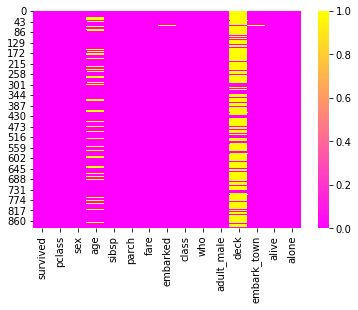

In [9]:
sns.heatmap(Titanic.isnull(), cmap="spring")

# Dropping tuple

In [10]:
#Since the highest null values are found in "deck" coloumn so dropping it respectively..

In [11]:
#Printing the original Dataset again

Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [12]:
#Dropping the deck coloumn

In [13]:
Titanic.drop("deck", axis=1, inplace=True)

In [14]:
#Printing the Dataset after dropping the coloumn 

In [15]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,1


In [16]:
Titanic.dropna(inplace=True)

# Mapping the heatmap for the updated Dataset

<AxesSubplot:>

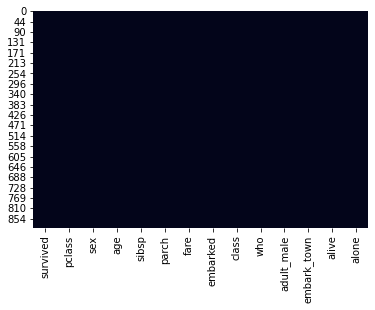

In [17]:
sns.heatmap(Titanic.isnull(), cbar=False)

In [18]:
#As you can see no null values found

In [19]:
#Now all the null values have been removed "CHECK"

Titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# All the null values are removed above

In [20]:
#Simplifying the data more by converting the string data types to integer.

# Separating the Sex coloumn by creating dumy values

In [21]:
pd.get_dummies(Titanic["sex"]).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
sex = pd.get_dummies(Titanic["sex"], drop_first=True)

In [23]:
sex.head(4)

,male
0,1
1,0
2,0
3,0


# Simplified sex of the people travelling in the above cell

In [24]:
#If we observe embark_town there are only two data types present which can be split in the form of integers

In [25]:
pd.get_dummies(Titanic["embarked"]).head(4)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1


In [26]:
embarked = pd.get_dummies(Titanic["embarked"], drop_first=True)

In [27]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Above is the simplified embark_town data

In [34]:
#Similarly for pclass

In [35]:
pclass = pd.get_dummies(Titanic["pclass"], drop_first=True)

In [36]:
pclass.head(4)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0


# Final updating Dataset

In [37]:
Titanic = pd.concat([Titanic, sex, embarked, pclass], axis=1)

In [38]:
#Printing the Updated Dataset

In [39]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,male,Q,S,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,0,1,0,1,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,1,0,0,1,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,0,0,0,1,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,1,1,0,1,1,0,1,0,1


# Finally Data is Preprocessed